## Inteligência Artificial 2025.1 : Atividade N1 - 2o Bimestre 

### Nome:

### RA:

Um engenheiro de computação foi contratado para trabalhar com **deep learning** em uma startup. Como em todos os segmentos de mercado que utilizam essa tecnologia, os dados analisados são confidenciais e não podem ser expostos ou vazados. Diante disso, o engenheiro trabalhará com a base de dados **"Base_N1_B2_2025.1.xlsx"**, sem o conhecimento do tipo de negócio que os dados foram extraídos. 

A partir dos dados fornecidos, o engenheiro de computação deve desenvolver:

**(5,0 pontos) um classificador utilizando Redes Neurais Artificiais que retorne a classe "Red" ou "Blue" para uma entrada [Feature1, Feature2];**

In [3]:
import pandas as pd

In [4]:
base = pd.read_excel('Base_N1_B2_2025.1.xlsx')

base.head(-1)

,Feature1,Feature2,Label
0,0.000000,0.000000,Blue
1,0.000125,0.002497,Blue
2,0.000499,0.004975,Blue
3,0.001121,0.007416,Blue
4,0.001987,0.009801,Blue
...,...,...,...
434,0.511800,0.155840,Red
435,0.521374,0.130673,Red
436,0.529706,0.104938,Red
437,0.536762,0.078695,Red


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  440 non-null    float64
 1   Feature2  440 non-null    float64
 2   Label     440 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.4+ KB


In [6]:
base['Label'].value_counts() / len(base)

Label
Blue    0.5
Red     0.5
Name: count, dtype: float64

In [7]:
stats = base.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Feature1,440.0,2.523234e-18,0.224790,-0.546932,-0.137426,0.0,0.137426,0.546932
Feature2,440.0,-4.037175e-18,0.223259,-0.473761,-0.146545,0.0,0.146545,0.473761


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [9]:
# Separar features e labels
X = base[['Feature1', 'Feature2']].values
y = base['Label'].values

In [10]:
# Codificar as classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [12]:
# Construir a Rede Neural
model = Sequential([
    Dense(10, input_shape=(2,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # saída binária
])

/Users/iscoutto/Documents/projects/ai-ml-algorithms/cefsa/redes-neurais/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5266 - loss: 0.6866 - val_accuracy: 0.6477 - val_loss: 0.6778
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 0.6818 - val_accuracy: 0.6705 - val_loss: 0.6644
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5916 - loss: 0.6696 - val_accuracy: 0.6705 - val_loss: 0.6564
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5689 - loss: 0.6793 - val_accuracy: 0.6932 - val_loss: 0.6517
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5964 - loss: 0.6618 - val_accuracy: 0.6705 - val_loss: 0.6569
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6055 - loss: 0.6643 - val_accuracy: 0.6818 - val_loss: 0.6500
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6054 - loss: 0.6675 - val_accuracy: 0.7045 - val_loss: 0.6446
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6115 - loss: 0.6599 - val_accuracy: 0.6591 - 

In [15]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {accuracy:.2%}")

Acurácia no teste: 77.27%


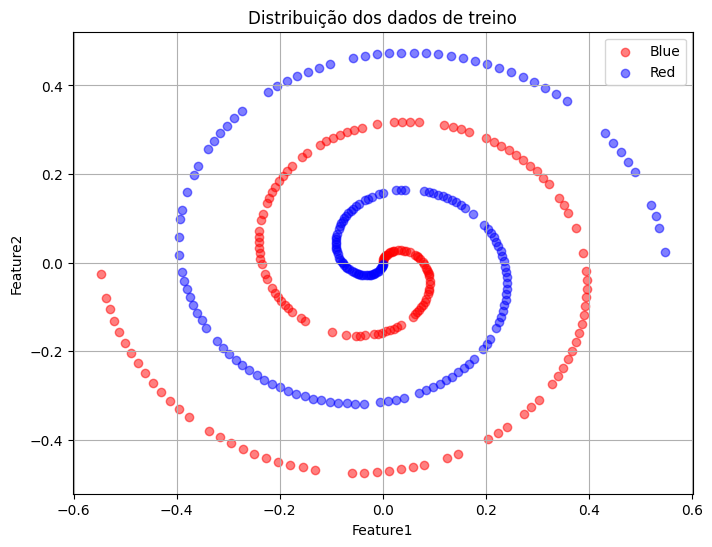

In [19]:
# Plotar os pontos reais
plt.figure(figsize=(8, 6))
for classe, cor in zip([0, 1], ['red', 'blue']):
    plt.scatter(X_train[y_train == classe, 0], X_train[y_train == classe, 1], 
                label=label_encoder.inverse_transform([classe])[0], c=cor, alpha=0.5)
plt.title("Distribuição dos dados de treino")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Gerar gráfico de região de decisão
# Criar uma grade de pontos
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 300),
    np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 205us/step


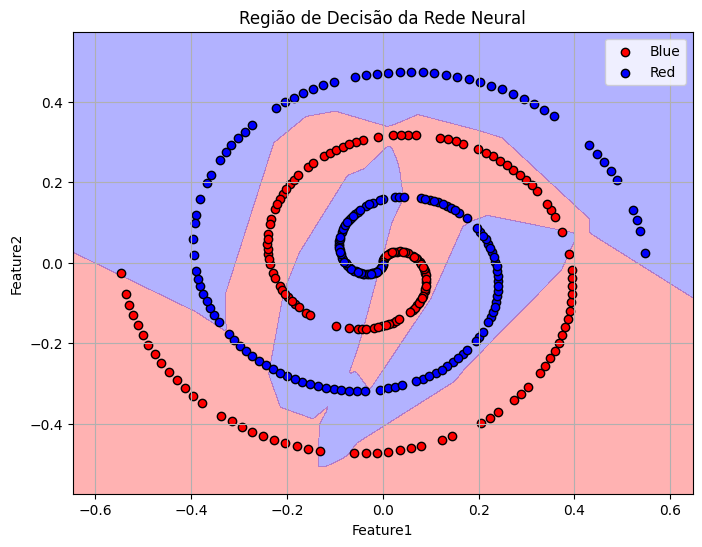

In [21]:
# Plotar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)

for classe, cor in zip([0, 1], ['red', 'blue']):
    plt.scatter(X_train[y_train == classe, 0], X_train[y_train == classe, 1],
                label=label_encoder.inverse_transform([classe])[0], c=cor, edgecolors='k')

plt.title("Região de Decisão da Rede Neural")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Exemplo de predição
entrada = np.array([[0.05, 0.03]])  # Exemplo qualquer
prob = model.predict(entrada)[0][0]
classe = label_encoder.inverse_transform([int(prob >= 0.5)])[0]
print(f"Classe prevista para a entrada {entrada[0]}: {classe}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Classe prevista para a entrada [0.05 0.03]: Blue


**(2,0 pontos) o diagrama da rede neural desenvolvida no item anterior e indicar a quantidade de parâmetros dessa rede;**

In [ ]:
#usar este espaco para desenvolver sua resposta

**(2,0 pontos) um parágrafo explicando a precisão da rede neural desenvolvida e os pontos de atenção que devem ser observados na utilização desta rede com novos dados;**

In [ ]:
#usar este espaco para desenvolver sua resposta

**(1,0 ponto) uma API para classificação de novos dados sem utilizar qualquer biblioteca ou método ("prediction") obtido no treinamento da rede neural.**

In [ ]:
#usar este espaco para desenvolver sua resposta

#### Lembre-se: na dúvida, você é o engenheiro do projeto!